In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


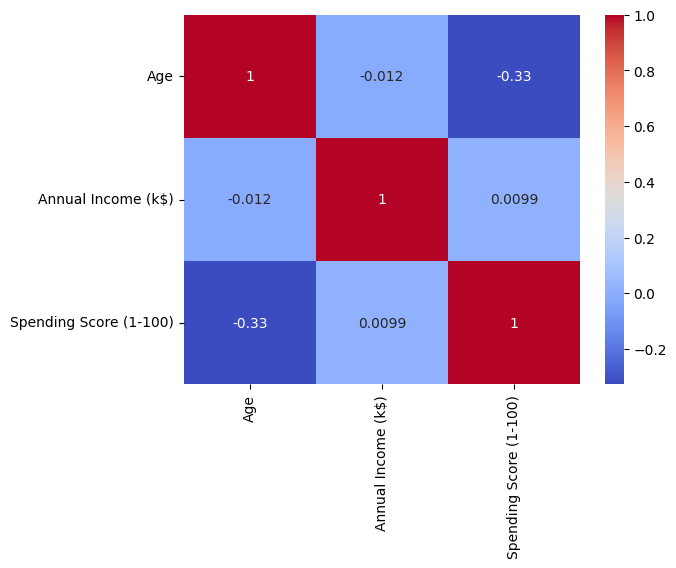

In [5]:
# Plot the correlation matrix using seaborn
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.show()

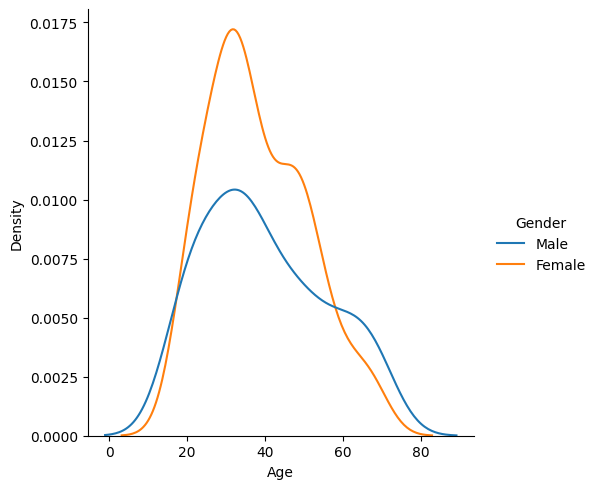

In [6]:
sns.displot(df, x = 'Age',hue='Gender', kind='kde')

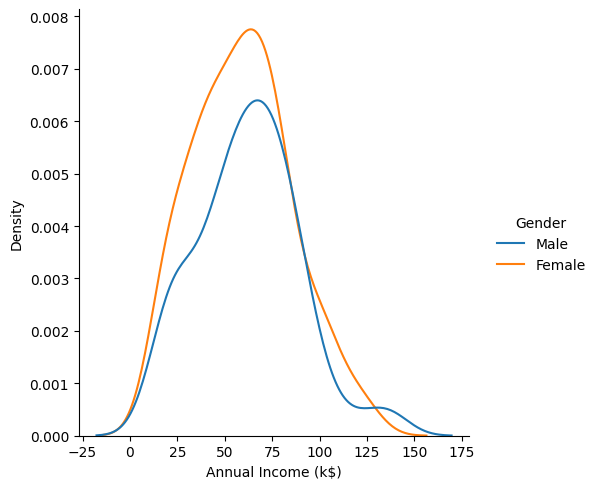

In [7]:
sns.displot(df, x = 'Annual Income (k$)',hue='Gender', kind='kde')

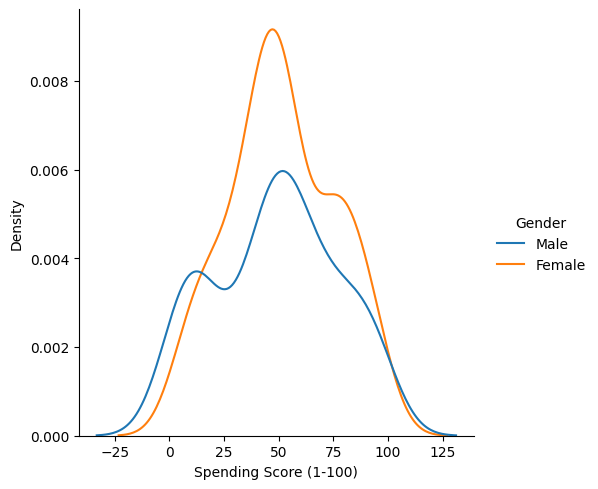

In [8]:
sns.displot(df, x = 'Spending Score (1-100)',hue='Gender', kind='kde')

In [9]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [10]:
features = ['Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']

In [11]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df[features])
    sse.append(km.inertia_)

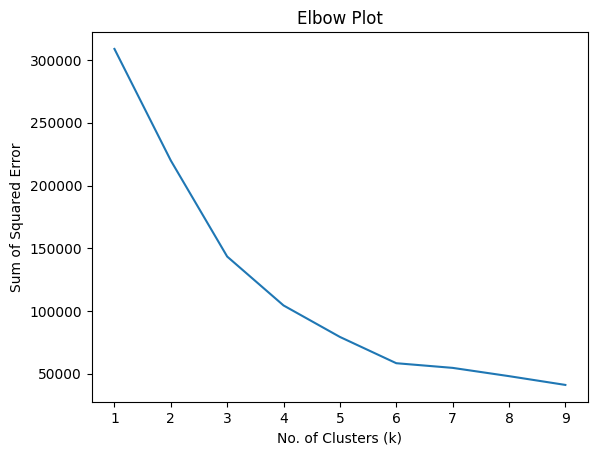

In [12]:
plt.plot([k for k in range(1,10)], sse)
plt.title("Elbow Plot")
plt.xlabel("No. of Clusters (k)")
plt.ylabel("Sum of Squared Error")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, random_state=44)

In [14]:
kmeans.fit(df[features])

KMeans(n_clusters=5, random_state=44)

In [15]:
labels = kmeans.labels_
df['Cluster'] = labels

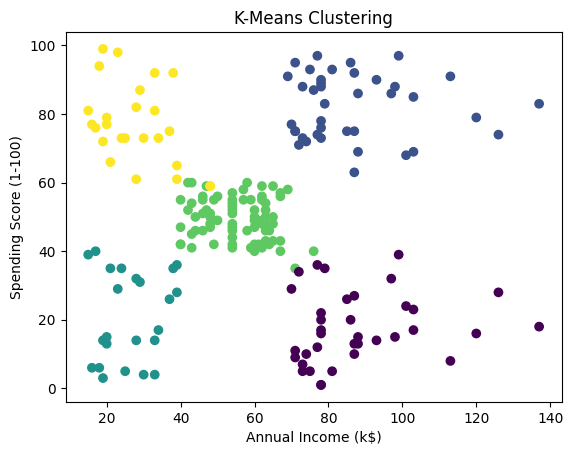

In [16]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')

plt.show()